In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df=pd.read_csv('C:/Users/priya/Downloads/archive (2)/heart.csv')

In [3]:
train_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
age         1025 non-null int64
sex         1025 non-null int64
cp          1025 non-null int64
trestbps    1025 non-null int64
chol        1025 non-null int64
fbs         1025 non-null int64
restecg     1025 non-null int64
thalach     1025 non-null int64
exang       1025 non-null int64
oldpeak     1025 non-null float64
slope       1025 non-null int64
ca          1025 non-null int64
thal        1025 non-null int64
target      1025 non-null int64
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
train_df.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [6]:
train_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
import numpy as np

In [8]:
three_std = 3
outliers = 0

# loop throgh whole dataframe
for i, j in enumerate(train_df.columns):
    # Check if std is greater than 0 for the math
    if train_df.std()[i] > 0:
        z_score = (i - train_df.mean()[i]) / train_df.std()[i] 
        # Uses z score to check for outliers amd adds it to a count 
        if np.abs(z_score) > three_std:
            outliers = outliers + 1

print(outliers)

12


In [9]:
df_replace_nan = train_df.mask(train_df.sub(train_df.mean()).div(train_df.std()).abs().gt(3))

In [10]:
df_replace_nan.isnull().sum().sum() 

56

In [11]:
df_replace_median = df_replace_nan.fillna(df_replace_nan.median())


In [12]:
df_replace_median.isnull().sum().sum()

0

In [13]:
train_df[['fbs', 'target']].groupby(['fbs']).mean()

,target
fbs,
0,0.521789
1,0.464052


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

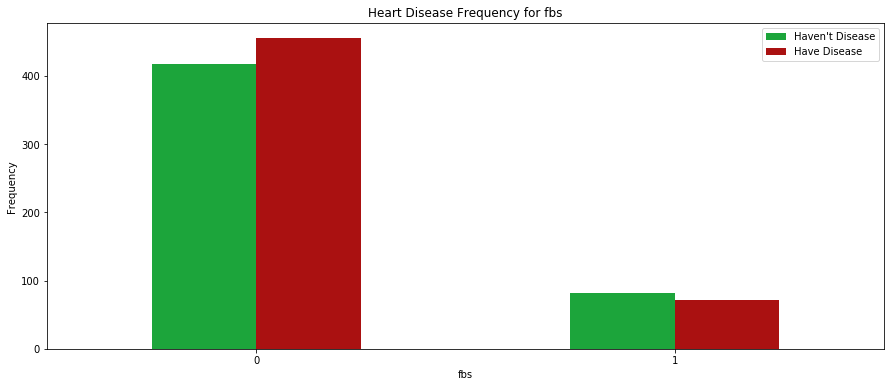

In [15]:
pd.crosstab(train_df.fbs,train_df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for fbs')
plt.xlabel('fbs')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

C:\Users\priya\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


([<matplotlib.axis.XTick at 0x22c8a997c08>,
 <a list of 10 Text xticklabel objects>)

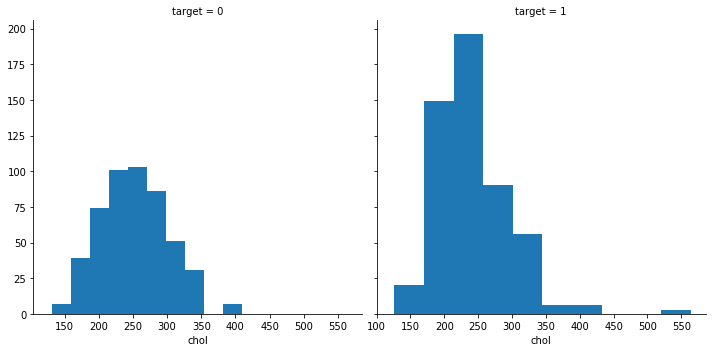

In [16]:
grid=sns.FacetGrid(train_df, col ='target', size=5)
grid.map(plt.hist,"chol")
plt.xticks(range(100,600,50))

In [17]:
train_df[['restecg', 'target']].groupby(['restecg']).mean()

,target
restecg,
0,0.430584
1,0.602339
2,0.200000


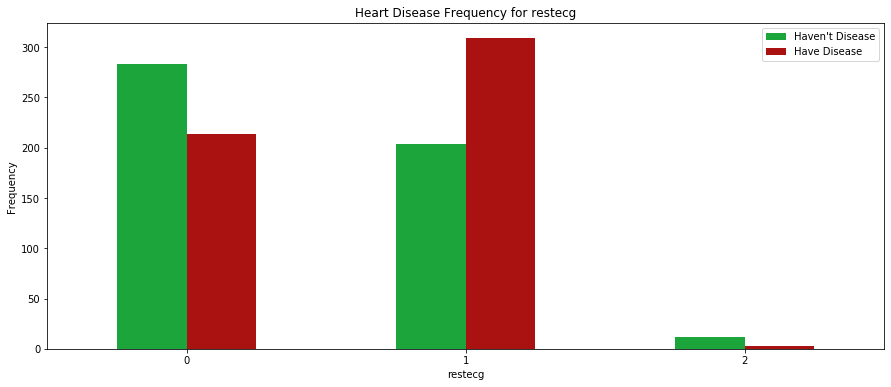

In [18]:
pd.crosstab(train_df.restecg,train_df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for restecg')
plt.xlabel('restecg')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

(14.0, 0.0)

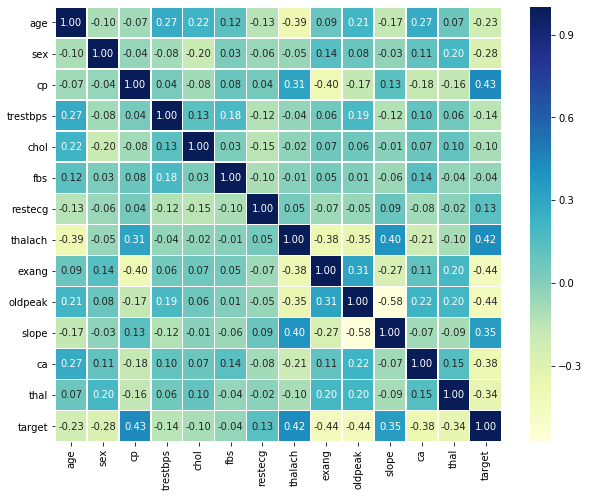

In [27]:
corr_matrix = train_df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

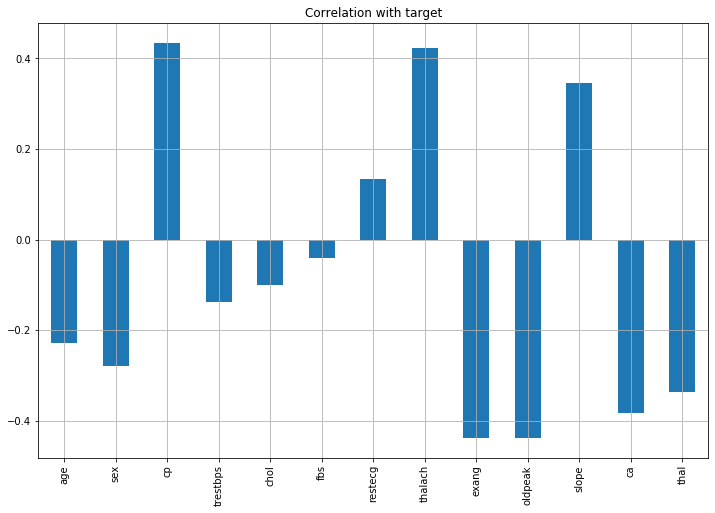

In [21]:
train_df.drop('target', axis=1).corrwith(train_df.target).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")